## Synthetic GMM
This Notebook applies the gaussian mixture model to the synthetic data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy.io import loadmat
import h5py
from utils.utils_gmm import *
from sklearn.preprocessing import MinMaxScaler
import pickle

sns.set_style('darkgrid')

SEED = 42

np.random.seed(SEED)
sns.set()

### Load Data

In [2]:
df = pd.read_csv("data/synthetic_data_6d.csv", index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 6 columns):
f0    2000 non-null float64
f1    2000 non-null float64
f2    2000 non-null float64
f3    2000 non-null float64
f4    2000 non-null float64
f5    2000 non-null float64
dtypes: float64(6)
memory usage: 109.4 KB


In [3]:
X = df.values
X.shape

(2000, 6)

In [4]:
N_COMPONENTS = 2

scores, gm = fit_predict_gm(X, N_COMPONENTS, SEED=SEED)
label = gm.predict(X)

scored_df = pd.DataFrame(X)
scored_df.columns = df.columns
scored_df.reset_index()
scored_df["score"] = scores
scored_df["label"] = label

sorted_df = scored_df.sort_values(by="score", ascending=False)
sorted_df.head(5)

,f0,f1,f2,f3,f4,f5,score,label
0,5.000000,5.000000,-1.264096,-2.222573,-1.009932,-1.759441,181.291279,0
1001,3.000000,11.000000,13.647764,13.292576,12.101727,13.604768,64.013212,1
1,3.000000,-1.054384,-0.972645,-0.991855,-0.881214,-1.067916,55.694920,0
1002,12.000000,6.000000,12.878718,11.445100,13.675763,11.066313,31.639885,1
1532,12.091579,12.990018,10.033628,12.821709,10.507418,9.252602,15.691256,1


In [5]:
# save the model
with open('results/gmm_synthetic.pkl', 'wb') as fid:
    pickle.dump(gm, fid)  

[]

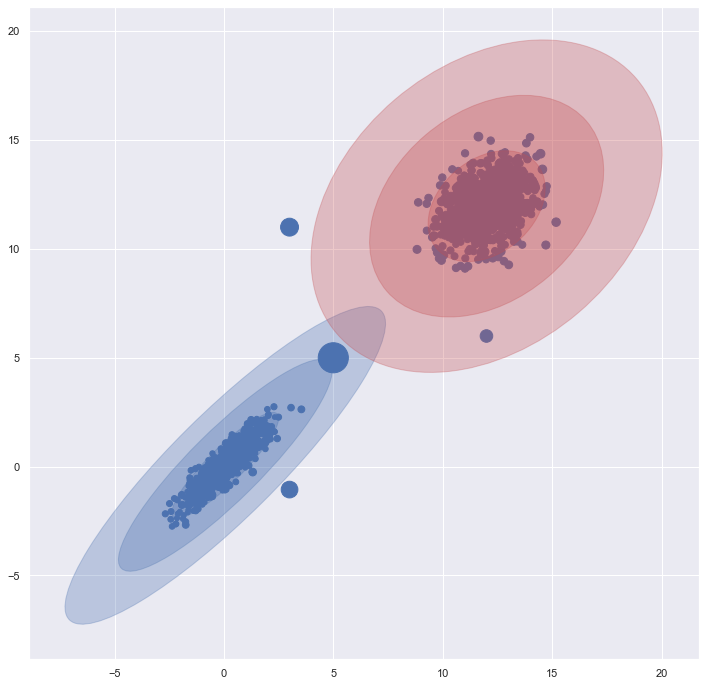

In [6]:
# plot the data. Size of the marker indicates the outlier score
fig, ax = plt.subplots(1, 1, figsize=(12,12))
ax.scatter(sorted_df["f0"],
          sorted_df["f1"],
          s=sorted_df["score"] * 5)
draw_components(gm, [0, 1], ax=ax)

plt.plot()

### Calculate distances per dimension

In [7]:
dist, cs = mah_dist_per_dim(gm, X, sorted_df.index.values)
distances = pd.DataFrame(dist, columns=df.columns)
distances.index = sorted_df.index
distances.head(3)

,f0,f1,f2,f3,f4,f5
0,11.235763,11.859324,3.614143,6.271836,3.360834,5.388299
1001,10.000239,0.709934,2.538296,1.765166,0.115856,2.514093
1,8.886036,3.620161,2.132091,1.756436,1.823425,2.323186


### Store Results

In [8]:
sorted_df.to_csv("results/gm_synthetic_scored.csv")
distances.to_csv("results/gm_synthetic_distances.csv")

### Examine Results

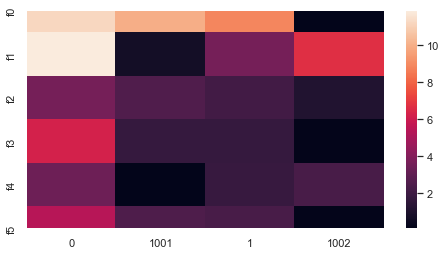

In [14]:
# plot the feature ranking ov all 4 outliers as heatmap
plt.figure(figsize=[8, 4])
sns.heatmap(distances.head(4).T)
plt.show()

<BarContainer object of 6 artists>

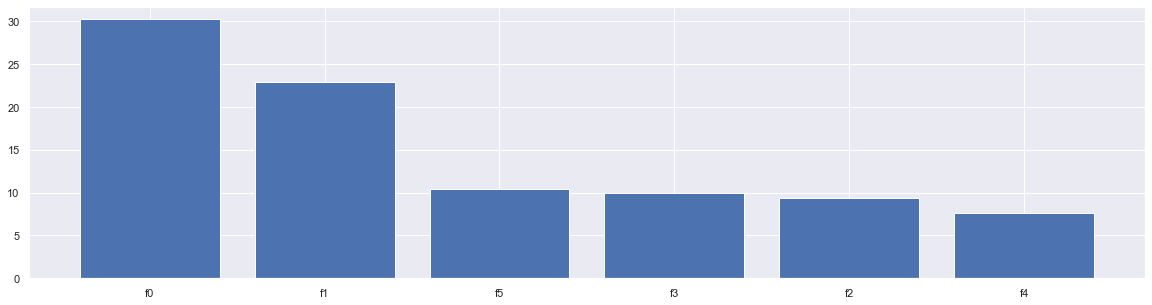

In [11]:
# sum up the feature ranking for the 4 outliers over all 6 dimensions
TOP_COLUMNS = 10
plt.figure(figsize=[20, 5])
dist_sum = distances.head(4).sum().sort_values(ascending=False)[:TOP_COLUMNS]
plt.bar(dist_sum.index, dist_sum.values)